# Geometric Transformations

Neste notebook, consideramos as transformações de imagem, como rotação, dimensionamento e distorção (ou não distorção!) de imagens. Essas transformações são frequentemente usadas como etapas de pré-processamento em aplicações como compreensão de documentos, onde a imagem digitalizada pode estar desalinhada.

Primeiramente importaremos as bibliotecas necessárias para trabalharmos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

#### Scaling

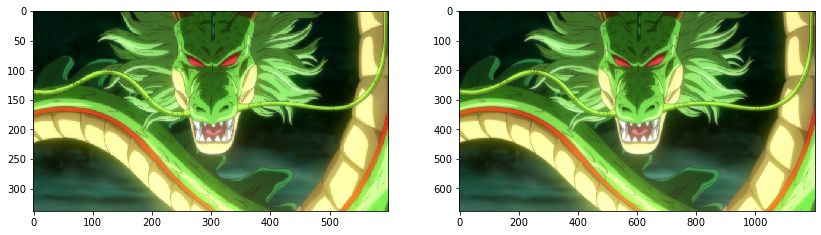

In [4]:
img = cv2.imread('imagens/shenlong.jpg')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB));

#### Translation

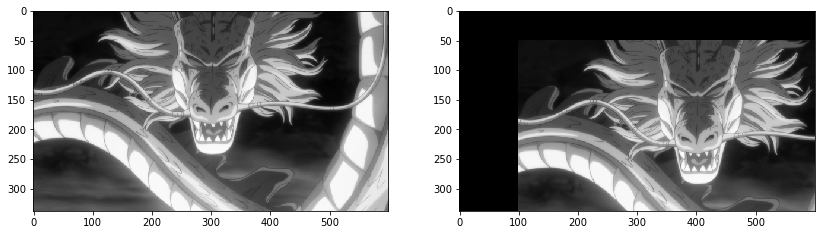

In [11]:
img = cv2.imread('imagens/shenlong.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray');

#### Rotation

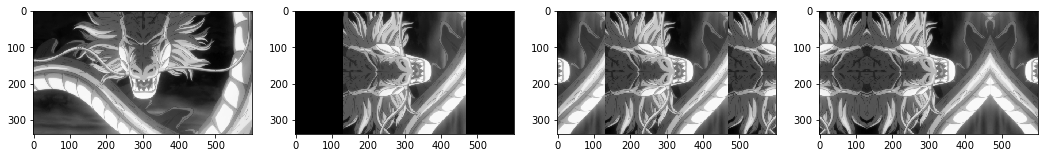

In [24]:
img = cv2.imread('imagens/shenlong.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray');

#### Affine Transformation

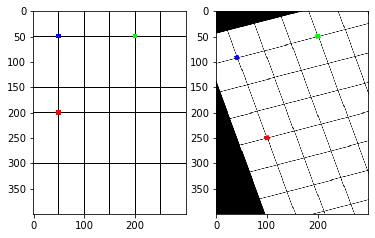

In [44]:
img = cv2.imread('imagens/desenho.png')
rows,cols,ch = img.shape

pts1 = np.float32([[20,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB));

#### Resize

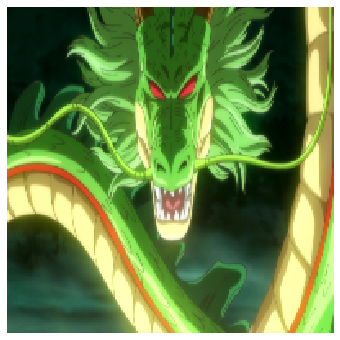

In [49]:
image = cv2.imread('imagens/shenlong.jpg')
resized = cv2.resize(image, (200, 200))
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB));
plt.axis('off');

##### Preservando o Aspect Ratio

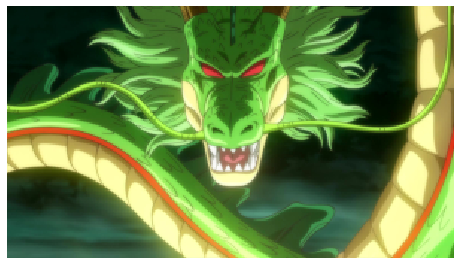

In [84]:
(h, w, d) = image.shape
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB));
plt.axis('off');

#### Perspective Transformation

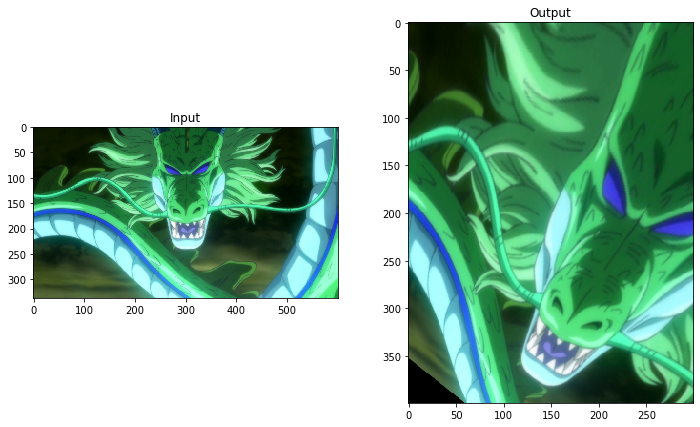

In [82]:
pt1 = np.float32([[50,65],[270,20],[100,280],[390,120]])
pt2 = np.float32([[0,0],[310,0],[0,310],[310,310]])

matrix_aff = cv2.getPerspectiveTransform(pt1,pt2)
dst = cv2.warpPerspective(image,matrix_aff,(cols,rows))

plt.figure(figsize=(12,7))
plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()